### DT - Decision Tree
___

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [140]:
wine = pd.read_csv('./datasets/winequality-red.csv', delimiter = ";")

In [141]:
wine.shape

(1599, 12)

In [142]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [143]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [144]:
# quality 3 4 5 -> 0, 6 7 8 -> 1

df = wine.copy()

In [145]:
def encoding(x):
    if x > 5:
        return 1
    else:
        return 0

In [146]:
df['target'] = df['quality'].apply(encoding)  # df['quality'].apply(lamda 1 if x > 5 else 0)

In [147]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [148]:
df = df.drop(['quality'], axis = 1)

In [149]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [150]:
# X, y 분리
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [151]:
# 학슴/테스트

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2022, stratify=y)

In [152]:
# 스케일링

ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
y_train = y_train.values

In [153]:
# 모델 학습

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [154]:
X_test = ss.transform(X_test)
y_test = y_test.values

In [155]:
y_pred = dt.predict(X_test)

In [156]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.759375

In [157]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm

array([[108,  41],
       [ 36, 135]], dtype=int64)

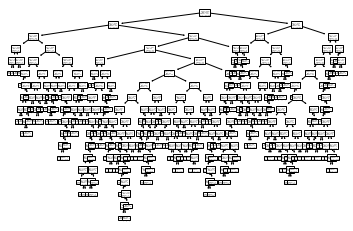

In [158]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(dt)
plt.show()

In [159]:
# GridSearch

In [160]:
from sklearn.model_selection import GridSearchCV

param = {
    'max_depth': range(10, 30),
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8]
}

model = DecisionTreeClassifier()
grid = GridSearchCV(dt, param, refit=True)  # CV 가 붙으면 내부적으로 CROSS VALIDATION을 한다는 것 (5번)
grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(10, 30),
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8]})

In [161]:
y_pred = grid.best_estimator_.predict(X_test)

In [162]:
accuracy_score(y_test, y_pred)

0.728125

In [98]:
#from sklearn.model_selection import GridSearchCV
#from sklearn import svm

#param = {
#    'C': range(1, 100),
#    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1., 5],
#    'kernel': ['rbf']
#}

#model = svm.SVC()
#gr = GridSearchCV(model, param, refit=True)  # CV 가 붙으면 내부적으로 CROSS VALIDATION을 한다는 것 (5번)
#gr.fit(X_train_scaled, y_train)

In [99]:
#gr.best_score_

In [100]:
#y_pred = gr.best_estimator_.predict(X_test)

In [101]:
#accuracy_score(y_test, y_pred)

In [163]:
dt.feature_importances_

array([0.07613961, 0.09012125, 0.06240838, 0.04238947, 0.06281625,
       0.06458435, 0.11170973, 0.06131305, 0.08183417, 0.12447642,
       0.22220732])

In [164]:
for name, value in zip(X.columns, dt.feature_importances_):
    print(name, value)

fixed acidity 0.07613960636346769
volatile acidity 0.09012125390320529
citric acid 0.06240837892572277
residual sugar 0.042389473914414715
chlorides 0.0628162465873265
free sulfur dioxide 0.06458434876053191
total sulfur dioxide 0.11170973232375131
density 0.061313049572300965
pH 0.08183416831756687
sulphates 0.12447641759797536
alcohol 0.22220732373373667


In [165]:
sr = pd.Series(dt.feature_importances_, index=X.columns)

In [166]:
sr = sr.sort_values(ascending=False)
sr

alcohol                 0.222207
sulphates               0.124476
total sulfur dioxide    0.111710
volatile acidity        0.090121
pH                      0.081834
fixed acidity           0.076140
free sulfur dioxide     0.064584
chlorides               0.062816
citric acid             0.062408
density                 0.061313
residual sugar          0.042389
dtype: float64

<AxesSubplot:>

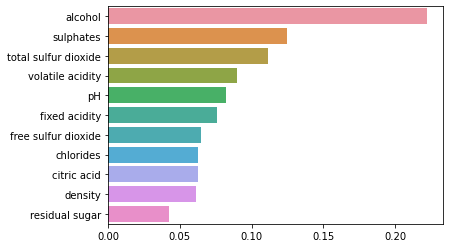

In [167]:
import seaborn as sns

sns.barplot(x=sr.values, y=sr.index)

In [169]:
# 모델 저장

import pickle

In [170]:
!python --version

Python 3.8.0


In [175]:
pickle.dump(grid.best_estimator_, open("my_dt.pkl", "wb"), protocol=4)

### 로딩

In [176]:
my_dt = pickle.load(open("my_dt.pkl", "rb"))

In [177]:
my_dt.predict(X_test)

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,

### Random Forest
___

In [178]:
X_train_scaled.shape, y_train.shape

((1279, 11), (1279,))

In [179]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [180]:
y_pred = rfc.predict(X_test)

In [181]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.809375

In [182]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': range(50, 200, 10),   # tree의 개수
    'max_depth': range(5, 10),
    'min_samples_leaf': range(5, 20)
}

dt = RandomForestClassifier()
grid = GridSearchCV(dt, param, refit=True)  # CV 가 붙으면 내부적으로 CROSS VALIDATION을 한다는 것 (5번)
grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(5, 10),
                         'min_samples_leaf': range(5, 20),
                         'n_estimators': range(50, 200, 10)})

In [183]:
y_pred = grid.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.79375